In [358]:
import pandas as pd

df1 = pd.read_csv("./Dataset/3-5 MB/Oxygen Dataset Final.csv")
# df2 = pd.read_csv("./Dataset/<1 MB/personality_dataset.csv")
# df3 = pd.read_csv("./Dataset/<1 MB/avocado.csv", index_col=0)
# df4 = pd.read_csv("./Dataset/<1 MB/spam_detection_dataset.csv")
# df5 = pd.read_csv("./Dataset/<1 MB/Mall_Customers.csv")

display(df1.head())
# display(df2.head())
# display(df3.head())
# display(df4.head())
# display(df5.head())

,age,gender,spo2,pr,c/nc,oxy_flow
0,27,0,74.0,72.0,1.0,6.0
1,53,1,NaN,110.0,NaN,28.0
2,56,0,99.0,98.0,1.0,NaN
3,26,1,NaN,110.0,1.0,4.0
4,52,0,69.0,84.0,1.0,0.0


In [359]:
# df1 = df1.drop(columns=['START_DATE*', 'END_DATE*', 'START*', 'STOP*'])
# df2 = df2.drop(columns=['Personality'])
# df3 = df3.drop(columns=['Date', 'region'])
# df4 = df4.drop(columns=['is_spam'])
# df5 = df5.drop(columns=['CustomerID'])

In [360]:
print("Missing Values Dataset 1:")
print(df1.isnull().sum())
# print("Missing Values Dataset 2:")
# print(df2.isnull().sum())
# print("Missing Values Dataset 3:")
# print(df3.isnull().sum())
# print("Missing Values Dataset 4:")
# print(df4.isnull().sum())
# print("Missing Values Dataset 5:")
# print(df5.isnull().sum())

Missing Values Dataset 1:
age             0
gender          0
spo2        26245
pr          32384
c/nc        26442
oxy_flow    37747
dtype: int64


In [361]:
import numpy as np

def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Deteksi dan imputasi missing value berdasarkan tipe data:
    - Numerik: diisi mean
    - Kategorikal: diisi modus
    """
    df_filled = df.copy()

    for col in df_filled.columns:
        if df_filled[col].isnull().sum() > 0:
            col_dtype = df_filled[col].dtype
            if np.issubdtype(col_dtype, np.number):
                # Imputasi numerik dengan mean
                mean_val = df_filled[col].mean()
                # Jika kolom integer, konversi mean ke int
                if np.issubdtype(col_dtype, np.integer):
                    mean_val = int(mean_val)
                df_filled[col] = df_filled[col].fillna(mean_val)
                print(f"Imputasi kolom numerik '{col}' dengan mean: {mean_val}")
            else:
                # Imputasi kategorikal dengan modus
                mode_val = df_filled[col].mode()[0]
                df_filled[col] = df_filled[col].fillna(mode_val)
                print(f"Imputasi kolom kategorikal '{col}' dengan modus: {mode_val}")

    return df_filled

In [362]:
df1 = handle_missing_values(df1)
# df2 = handle_missing_values(df2)
# df3 = handle_missing_values(df3)
# df4 = handle_missing_values(df4)
# df5 = handle_missing_values(df5)

Imputasi kolom numerik 'spo2' dengan mean: 88.14980863860033
Imputasi kolom numerik 'pr' dengan mean: 92.57098964299351
Imputasi kolom numerik 'c/nc' dengan mean: 0.7822399428433147
Imputasi kolom numerik 'oxy_flow' dengan mean: 18.619144176070705


In [363]:
print("Missing Values Dataset 1:")
print(df1.isnull().sum())
# print("Missing Values Dataset 2:")
# print(df2.isnull().sum())
# print("Missing Values Dataset 3:")
# print(df3.isnull().sum())
# print("Missing Values Dataset 4:")
# print(df4.isnull().sum())
# print("Missing Values Dataset 5:")
# print(df5.isnull().sum())

Missing Values Dataset 1:
age         0
gender      0
spo2        0
pr          0
c/nc        0
oxy_flow    0
dtype: int64


In [364]:
import matplotlib.pyplot as plt

def plot_boxplots_matplotlib(dataframe, before_outlier=True):
    """
    Menampilkan boxplot dari DataFrame menggunakan matplotlib.
    """
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    df_for_plot = dataframe[numeric_columns]

    plt.figure(figsize=(12, 6))
    df_for_plot.boxplot()
    title = f"Boxplot {'(Sebelum Outlier)' if before_outlier else '(Setelah Outlier)'}"
    plt.title(title)
    plt.ylabel("Nilai")
    plt.xticks(rotation=45)
    plt.show()

def handle_outliers_iqr(dataframe):
    """
    Mendeteksi dan menangani outlier menggunakan IQR dan visualisasi matplotlib.
    """
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    total_outliers = 0
    columns_with_outliers = []

    if len(numeric_columns) == 0:
        print("Tidak ada kolom numerik.")
        return dataframe

    df_no_outlier = dataframe.copy()

    print("Menampilkan boxplot sebelum outlier...")
    plot_boxplots_matplotlib(dataframe, before_outlier=True)

    print("Mendeteksi outlier...")
    for col in numeric_columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        n_outliers = len(dataframe[(dataframe[col] < lower) | (dataframe[col] > upper)])
        total_outliers += n_outliers
        if n_outliers > 0:
            columns_with_outliers.append(col)
            # Bisa juga gunakan lower/upper untuk clipping:
            # df_no_outlier[col] = dataframe[col].clip(lower=lower, upper=upper)
            lower_clip = dataframe[col].quantile(0.05)
            upper_clip = dataframe[col].quantile(0.95)
            df_no_outlier[col] = dataframe[col].clip(lower=lower_clip, upper=upper_clip)
            print(f"{n_outliers} outlier di kolom '{col}', sudah di-clip.")
        else:
            print(f"Tidak ada outlier di kolom '{col}'.")

    if total_outliers == 0:
        print("Tidak ada outlier yang perlu ditangani.")

    print("Menampilkan boxplot setelah penanganan outlier...")
    plot_boxplots_matplotlib(df_no_outlier, before_outlier=False)

    return df_no_outlier

Menampilkan boxplot sebelum outlier...


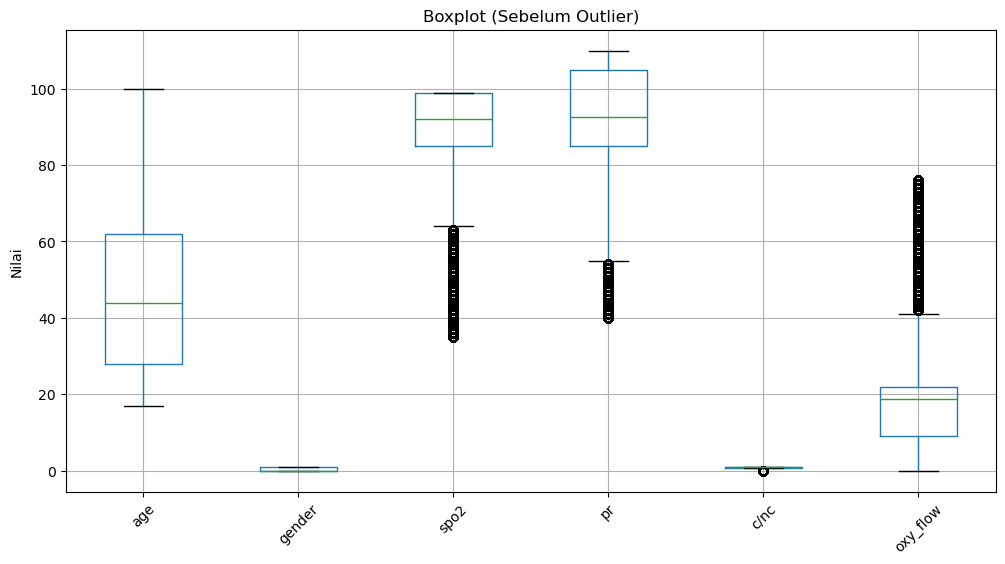

Mendeteksi outlier...
Tidak ada outlier di kolom 'age'.
Tidak ada outlier di kolom 'gender'.
15928 outlier di kolom 'spo2', sudah di-clip.
3437 outlier di kolom 'pr', sudah di-clip.
37794 outlier di kolom 'c/nc', sudah di-clip.
13589 outlier di kolom 'oxy_flow', sudah di-clip.
Menampilkan boxplot setelah penanganan outlier...


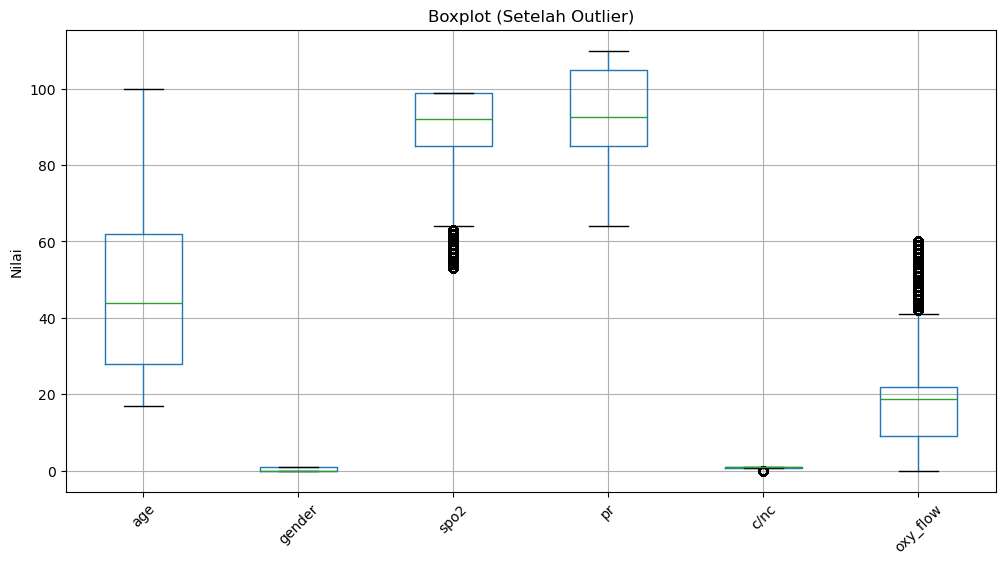

In [365]:
df1 = handle_outliers_iqr(df1)
# df2 = handle_outliers_iqr(df2)
# df3 = handle_outliers_iqr(df3)
# df4 = handle_outliers_iqr(df4)
# df5 = handle_outliers_iqr(df5)

In [366]:
def check_categorical_columns(df: pd.DataFrame) -> None:
    """
    Print jumlah dan nama-nama kolom kategorikal dalam DataFrame,
    termasuk kolom bertipe bool.
    """
    # Cek kolom object, category, dan bool
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    num_categorical = len(categorical_cols)

    bool_cols = df.select_dtypes(include=['bool']).columns
    num_bool = len(bool_cols)

    for col in bool_cols:
        df[col] = df[col].astype('int8')
        print(f"Konversi kolom boolean '{col}' ke int8")

    print(f"Jumlah kolom kategorikal (termasuk bool): {num_categorical + num_bool}")
    print(f"Nama kolom kategorikal (termasuk bool): {list(categorical_cols) + list(bool_cols)}")

In [367]:
check_categorical_columns(df1)
# check_categorical_columns(df2)
# check_categorical_columns(df3)
# check_categorical_columns(df4)
# check_categorical_columns(df5)

df1_num_cols = df1.select_dtypes(include=['number']).columns.tolist()
# df2_num_cols = df2.select_dtypes(include=['number']).columns.tolist()
# df3_num_cols = df3.select_dtypes(include=['number']).columns.tolist()
# df4_num_cols = df4.select_dtypes(include=['number']).columns.tolist()
# df5_num_cols = df5.select_dtypes(include=['number']).columns.tolist()

Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []


In [368]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(cat_cols) == 0:
        return df

    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
    df = df.drop(columns=cat_cols)
    df = pd.concat([df, encoded_df], axis=1)

    return df

In [369]:
df1 = encode_categorical_columns(df1)
# df2 = encode_categorical_columns(df2)
# df3 = encode_categorical_columns(df3)
# df4 = encode_categorical_columns(df4)
# df5 = encode_categorical_columns(df5)

In [370]:
check_categorical_columns(df1)
# check_categorical_columns(df2)
# check_categorical_columns(df3)
# check_categorical_columns(df4)
# check_categorical_columns(df5)

Jumlah kolom kategorikal (termasuk bool): 0
Nama kolom kategorikal (termasuk bool): []


In [371]:
def is_all_numeric(df: pd.DataFrame):
    """
    Mengembalikan True jika semua kolom dalam DataFrame bertipe numerik.
    Jika ada kolom non-numerik, mengembalikan False dan mencetak nama kolom tersebut.
    """
    non_numeric_cols = df.select_dtypes(exclude=['number']).columns

    if len(non_numeric_cols) == 0:
        print("Semua kolom bertipe numerik.")
    else:
        print("Ditemukan kolom non-numerik:")
        print(list(non_numeric_cols))

In [372]:
is_all_numeric(df1)
# is_all_numeric(df2)
# is_all_numeric(df3)
# is_all_numeric(df4)
# is_all_numeric(df5)

Semua kolom bertipe numerik.


In [373]:
from sklearn.preprocessing import StandardScaler

def normalize_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Normalisasi kolom numerik dalam DataFrame menggunakan StandardScaler.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [374]:
df1 = normalize_columns(df1, df1_num_cols)
# df2 = normalize_columns(df2, df2_num_cols)
# df3 = normalize_columns(df3, df3_num_cols)
# df4 = normalize_columns(df4, df4_num_cols)
# df5 = normalize_columns(df5, df5_num_cols)

In [375]:
print("Dataset 1 setelah normalisasi:")
display(df1.head())
# print("Dataset 2 setelah normalisasi:")
# display(df2.head())
# print("Dataset 3 setelah normalisasi:")
# display(df3.head())
# print("Dataset 4 setelah normalisasi:")
# display(df4.head())
# print("Dataset 5 setelah normalisasi:")
# display(df5.head())

Dataset 1 setelah normalisasi:


,age,gender,spo2,pr,c/nc,oxy_flow
0,-0.883886,-0.764894,-1.137648,-1.539844,5.663851e-01,-0.859870
1,0.309353,1.307371,-0.044577,1.249720,8.662935e-16,0.721604
2,0.447035,-0.764894,0.793599,0.368805,5.663851e-01,0.047259
3,-0.929779,1.307371,-0.044577,1.249720,5.663851e-01,-1.003640
4,0.263460,-0.764894,-1.523897,-0.658929,5.663851e-01,-1.291181


In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity_matrix(similarity: pd.DataFrame, max_items=100, cmap='viridis', annot=False):
    """
    Visualisasikan similarity matrix dari cuDF DataFrame menggunakan heatmap.

    Parameters:
        similarity (DataFrame): Similarity matrix dalam format DataFrame.
        max_items (int): Maksimal jumlah baris/kolom yang divisualisasikan (default: 100).
        cmap (str): Colormap untuk heatmap (default: 'viridis').
        annot (bool): Tampilkan nilai pada setiap sel (default: False).
    """

    # Jika matrix terlalu besar, ambil subset
    if similarity.shape[0] > max_items or similarity.shape[1] > max_items:
        similarity = similarity.iloc[:max_items, :max_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity, cmap=cmap, annot=annot, fmt=".2f")
    plt.title('Similarity Matrix Heatmap')
    plt.xlabel('Item')
    plt.ylabel('Item')
    plt.show()


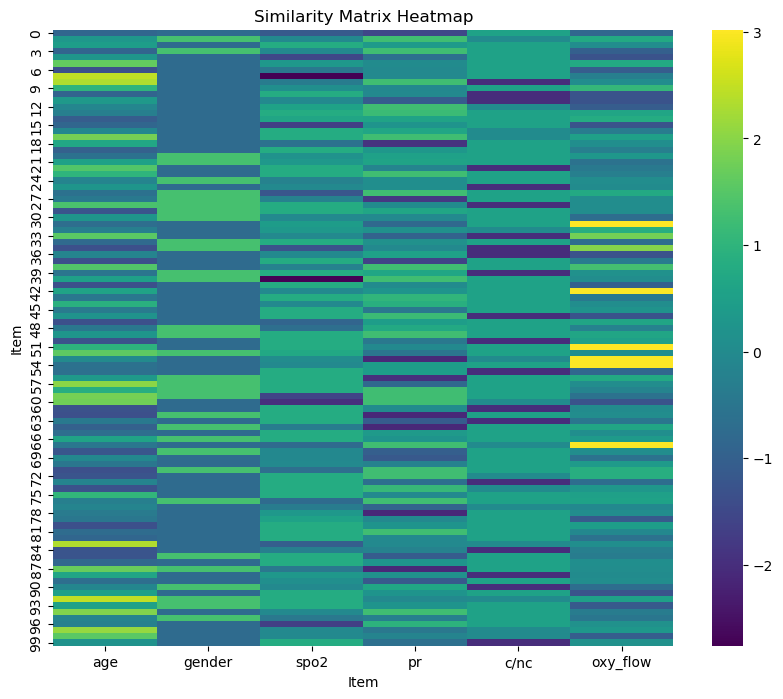

In [377]:
visualize_similarity_matrix(df1)
# visualize_similarity_matrix(df2)
# visualize_similarity_matrix(df3)
# visualize_similarity_matrix(df4)
# visualize_similarity_matrix(df5)

In [378]:
k = 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans_cpu = KMeans(n_clusters=k)

# Clustering di CPU
df1_cluster_labels = kmeans_cpu.fit_predict(df1)
# df2_cluster_labels = kmeans_cpu.fit_predict(df2)
# df3_cluster_labels = kmeans_cpu.fit_predict(df3)
# df4_cluster_labels = kmeans_cpu.fit_predict(df4)
# df5_cluster_labels = kmeans_cpu.fit_predict(df5)

sil_score_df1 = silhouette_score(df1, df1_cluster_labels)
print(f"Silhouette Score Dataset 1 (CPU): {sil_score_df1}")
# sil_score_df2 = silhouette_score(df2, df2_cluster_labels)
# print(f"Silhouette Score Dataset 2 (CPU): {sil_score_df2}")
# sil_score_df3 = silhouette_score(df3, df3_cluster_labels)
# print(f"Silhouette Score Dataset 3 (CPU): {sil_score_df3}")
# sil_score_df4 = silhouette_score(df4, df4_cluster_labels)
# print(f"Silhouette Score Dataset 4 (CPU): {sil_score_df4}")
# sil_score_df5 = silhouette_score(df5, df5_cluster_labels)
# print(f"Silhouette Score Dataset 5 (CPU): {sil_score_df5}")

In [ ]:
def kmeans_metrics_cpu(X, max_k=12, random_state=42, max_iter=1000):
    inertia = []
    silhouette_scores = []
    k_values = range(2, max_k + 1)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, max_iter=max_iter)
        cluster_labels = kmeans.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(sil_score)
        inertia.append(kmeans.inertia_)
    return k_values, inertia, silhouette_scores

In [ ]:
def plot_elbow_and_silhouette(k_values, inertia, silhouette_scores, title_suffix):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.title(f'Elbow Method for Optimal k - {"" if title_suffix == "" else title_suffix}')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o', color='orange')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Scores for Different k - {"" if title_suffix == "" else title_suffix}')
    plt.xticks(k_values)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

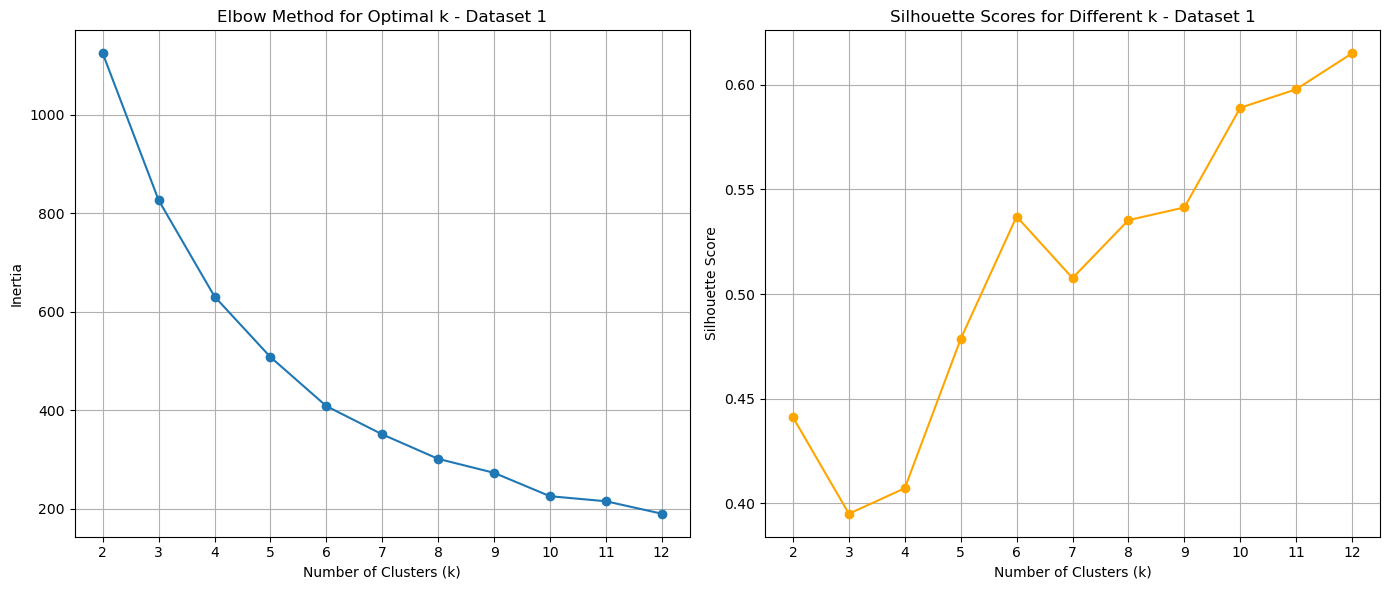

Highest Silhouette Score for Dataset 1: 0.6150129472256796 at k=12


In [ ]:
for i, df in enumerate([df1], start=1):
    k_values, inertia, sil = kmeans_metrics_cpu(df, max_k=12)
    plot_elbow_and_silhouette(
        k_values, inertia, sil,
        title_suffix=f"Dataset {i}"
    )
    print(f"Highest Silhouette Score for Dataset {i}: {max(sil)} at k={k_values[sil.index(max(sil))]}")

In [ ]:
df1_optimal_k = 12
# df2_optimal_k = 2
# df3_optimal_k = 2
# df4_optimal_k = 5
# df5_optimal_k = 6

In [ ]:
kmeans_optimal_df1 = KMeans(n_clusters=df1_optimal_k, random_state=42, max_iter=1000)
# kmeans_optimal_df2 = KMeans(n_clusters=df2_optimal_k, random_state=42, max_iter=1000)
# kmeans_optimal_df3 = KMeans(n_clusters=df3_optimal_k, random_state=42, max_iter=1000)
# kmeans_optimal_df4 = KMeans(n_clusters=df4_optimal_k, random_state=42, max_iter=1000)
# kmeans_optimal_df5 = KMeans(n_clusters=df5_optimal_k, random_state=42, max_iter=1000)

df1_cluster_labels_optimal = kmeans_optimal_df1.fit_predict(df1)
# df2_cluster_labels_optimal = kmeans_optimal_df2.fit_predict(df2)
# df3_cluster_labels_optimal = kmeans_optimal_df3.fit_predict(df3)
# df4_cluster_labels_optimal = kmeans_optimal_df4.fit_predict(df4)
# df5_cluster_labels_optimal = kmeans_optimal_df5.fit_predict(df5)

sil_score_df1_optimal = silhouette_score(df1, df1_cluster_labels_optimal)
print(f"Optimal Silhouette Score Dataset 1: {sil_score_df1_optimal}")
# sil_score_df2_optimal = silhouette_score(df2, df2_cluster_labels_optimal)
# print(f"Optimal Silhouette Score Dataset 2: {sil_score_df2_optimal}")
# sil_score_df3_optimal = silhouette_score(df3, df3_cluster_labels_optimal)
# print(f"Optimal Silhouette Score Dataset 3: {sil_score_df3_optimal}")
# sil_score_df4_optimal = silhouette_score(df4, df4_cluster_labels_optimal)
# print(f"Optimal Silhouette Score Dataset 4: {sil_score_df4_optimal}")
# sil_score_df5_optimal = silhouette_score(df5, df5_cluster_labels_optimal)
# print(f"Optimal Silhouette Score Dataset 5: {sil_score_df5_optimal}")

Optimal Silhouette Score Dataset 1: 0.6150129472256796


In [ ]:
from sklearn.decomposition import PCA

def get_pca_2d(X):
    """Reduksi seluruh fitur ke 2D dengan PCA (CPU, sklearn)."""
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    return X_pca

def plot_all_clusters_pca_subplot_cpu(datasets, labels, dataset_names):
    """
    Visualisasi semua hasil clustering (CPU) dalam 1 canvas subplot grid.
    """
    n = len(datasets)
    fig, axes = plt.subplots(n, 1, figsize=(8, 4*n))
    if n == 1:
        axes = [axes]
    for i in range(n):
        X_pca_cpu = get_pca_2d(datasets[i])
        scatter_cpu = axes[i].scatter(X_pca_cpu[:, 0], X_pca_cpu[:, 1], c=labels[i], cmap='viridis', alpha=0.7)
        axes[i].set_title(f"{dataset_names[i]} - CPU")
        axes[i].set_xlabel("PCA 1")
        axes[i].set_ylabel("PCA 2")
        fig.colorbar(scatter_cpu, ax=axes[i], label='Cluster')
    plt.tight_layout()
    plt.show()


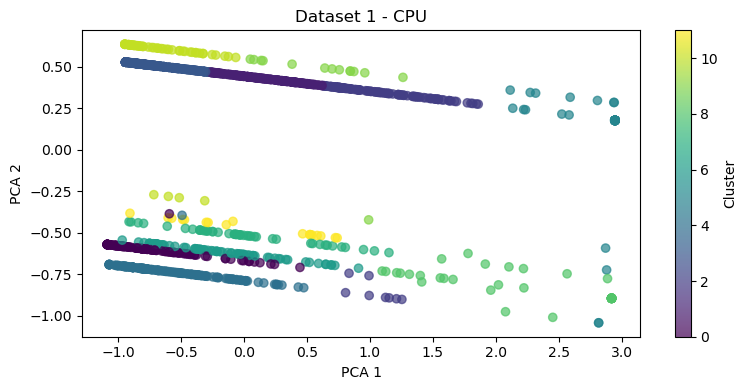

In [ ]:
datasets = [df1]
labels = [
    df1_cluster_labels_optimal
    # df2_cluster_labels_optimal,
    # df3_cluster_labels_optimal,
    # df4_cluster_labels_optimal,
    # df5_cluster_labels_optimal
]
dataset_names = [
    "Dataset 1"
    # "Dataset 2",
    # "Dataset 3",
    # "Dataset 4",
    # "Dataset 5"
]
plot_all_clusters_pca_subplot_cpu(datasets, labels, dataset_names)